### San Francisco International Airport Air Traffic Landings Statistics Data Analysis

#### - Air Traffic Landings Statistics Data is published by Publishing Department Airport (SFO) 

### Dataset details:
#### - Dataset Name: air_traffic_landings_statistics.csv
#### - Dataset Source: (https://www.data.gov/)
#### - Dataset shape: 26457 rows & 14 columns
#### - Metadata Updated: August 7, 2021
#### - Category: Transportation (Air Traffic)


## Preliminary Wrangling

### Cleaning effort in dataset:
- Fixing null values in dataset (IATA Codes and Aircraft Manufacturer) by getting the missing values from IATA website and Google search 
- Checking on duplicates (N fixing required)
- Split column (Activity Period) to (Year and Month columns)
- Change the data type of (Year and Month columns) from integer to Datetime


### Tidiness effort in dataset:
- Rename the columns with representative names({Operating Airline': 'Airline','Operating Airline IATA Code':'IATA Code','GEO Summary':'Flight Type','GEO Region':'Region','Landing Aircraft Type':'Aircraft Type','Total Landed Weight':'Landed Weight'})
- Drop duplicated columns that won't be used in analysis(Published Airline, Published Airline IATA Code)
- Drop trivial columns that won't be used in analysis (Activity Period, Aircraft Version)
- Rearrange the Dataset to a presentable format

In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

In [78]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_dd948ea915ef46cdbf50ca0b4b6c17d2 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_dd948ea915ef46cdbf50ca0b4b6c17d2 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_dd948ea915ef46cdbf50ca0b4b6c17d2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8CLphTse9pTcSyyCb3Lbd-u7d0Lsvk_tl1dCmxkZPVi3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_dd948ea915ef46cdbf50ca0b4b6c17d2)

body = client_dd948ea915ef46cdbf50ca0b4b6c17d2.get_object(Bucket='eda-donotdelete-pr-kdlp3yeobhowxd',Key='air_traffic_landings_statistics.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [79]:
# get the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              26457 non-null  int64 
 1   Operating Airline            26457 non-null  object
 2   Operating Airline IATA Code  26362 non-null  object
 3   Published Airline            26457 non-null  object
 4   Published Airline IATA Code  26362 non-null  object
 5   GEO Summary                  26457 non-null  object
 6   GEO Region                   26457 non-null  object
 7   Landing Aircraft Type        26457 non-null  object
 8   Aircraft Body Type           26457 non-null  object
 9   Aircraft Manufacturer        26440 non-null  object
 10  Aircraft Model               26457 non-null  object
 11  Aircraft Version             25299 non-null  object
 12  Landing Count                26457 non-null  int64 
 13  Total Landed Weight          26

In [80]:
# get the data shape(rows,columns)
df.shape

(26457, 14)

In [81]:
# get the data type
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Landing Aircraft Type          object
Aircraft Body Type             object
Aircraft Manufacturer          object
Aircraft Model                 object
Aircraft Version               object
Landing Count                   int64
Total Landed Weight             int64
dtype: object

In [82]:
# check duplicated values 
df.duplicated().sum()

2

In [83]:
# check duplicated records
df[df.duplicated()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
18281,201610,American Airlines,AA,American Airlines,AA,Domestic,US,Passenger,Wide Body,Boeing,B763,-,1,310000
20961,201803,Air France,AF,Air France,AF,International,Europe,Passenger,Wide Body,Boeing,B772,-,1,460104


In [84]:
# check the null values
df.isna().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code      95
Published Airline                 0
Published Airline IATA Code      95
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            17
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
dtype: int64

In [85]:
# check the null values in IATA Codes
df[df["Operating Airline IATA Code"].isna()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
176,200508,Boeing Company,NaN,Boeing Company,NaN,International,Asia,Passenger,Wide Body,Boeing,777,200,1,350000
2641,200703,Focus Air,NaN,Focus Air,NaN,International,Asia,Freighter,Wide Body,Boeing,747,200,10,6300000
2768,200704,Focus Air,NaN,Focus Air,NaN,International,Asia,Freighter,Wide Body,Boeing,747,200,6,3780000
6652,200909,E.A.G.L.E.,NaN,E.A.G.L.E.,NaN,Domestic,US,Freighter,Narrow Body,Boeing,757,200PF,1,210000
7741,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-87,-,1,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25851,202101,Swissport USA,NaN,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727525
25960,202102,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,1,727525
26190,202104,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,300,1,320000
26191,202104,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,1,727525


In [86]:
# check the null values in Aircraft Manufacturer
df[df["Aircraft Manufacturer"].isna()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
7869,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Passenger,Narrow Body,NaN,IL-62,-,1,235743
7870,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Passenger,Wide Body,NaN,IL-96,-,3,1156680
8272,201009,Servisair,NaN,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,784000
8809,201101,Servisair,NaN,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,2,1568000
9883,201109,Servisair,NaN,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389
10019,201110,Servisair,NaN,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389
13117,201309,Servisair,NaN,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,727525
19292,201704,Swissport USA,NaN,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727500
19293,201704,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Freighter,Wide Body,NaN,A124,-,3,2182500
19454,201705,Swissport USA,NaN,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,3,2182500


In [87]:
# fix the null values IATA Codes
df[df["Operating Airline"]=="Swissport USA"]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
7756,201005,Swissport USA,NaN,Swissport USA,NaN,International,South America,Freighter,Wide Body,McDonnell Douglas,DC-10,10,1,363000
10805,201204,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Airbus,A340,300,2,820000
12448,201304,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,747,400,2,1330000
12449,201304,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Boeing,747,400BCF,1,666000
12450,201304,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,300,1,320000
12583,201305,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Boeing,747,400,1,794000
12853,201307,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Boeing,747,400,1,761398
12854,201307,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Boeing,767,322,2,640000
13132,201309,Swissport USA,NaN,Swissport USA,NaN,International,Europe,Freighter,Wide Body,Boeing,747,400F,1,666000
13541,201312,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,200,1,259407


In [88]:
# fix the null values IATA Codes by list the indexs of NAN values and repalce with correct IATA Code
# Get the IATA Code for missing values from  IATA website (https://www.iata.org/en/publications/directories/code-search)
df.loc[(df['Operating Airline'] == 'Swissport USA'),['Operating Airline', 'Operating Airline IATA Code']]
list = [7756,10805,12448,12449,12450,12583,12853,12854,13132,13541,13674,13807,13943,13944,15016,15017,18512,18664,19292,19293,19294,19454,19455,19624,20287,20754,22004,24954,24955,25031,25111,25196,25197,25198,25291,25292,25393,25497,25498,25610,25611,25850,25851,25960,26190,26191,26312]
for i in list:
    df.at[i, 'Operating Airline IATA Code'] = 'UJ'

In [89]:
df[df['Operating Airline'] == 'Swissport USA']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
7756,201005,Swissport USA,UJ,Swissport USA,NaN,International,South America,Freighter,Wide Body,McDonnell Douglas,DC-10,10,1,363000
10805,201204,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Airbus,A340,300,2,820000
12448,201304,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,747,400,2,1330000
12449,201304,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Boeing,747,400BCF,1,666000
12450,201304,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,300,1,320000
12583,201305,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Boeing,747,400,1,794000
12853,201307,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Boeing,747,400,1,761398
12854,201307,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Passenger,Wide Body,Boeing,767,322,2,640000
13132,201309,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Freighter,Wide Body,Boeing,747,400F,1,666000
13541,201312,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,200,1,259407


In [90]:
df[df['Operating Airline'] == 'Servisair']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
7741,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-87,-,1,130000
8141,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-80,-,1,128000
8272,201009,Servisair,NaN,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,784000
8809,201101,Servisair,NaN,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,2,1568000
8810,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-80,-,1,128000
9080,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-80,-,1,128000
9481,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,Boeing,757,200,1,210000
9482,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-80,-,1,128000
9615,201107,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Narrow Body,McDonnell Douglas,MD-80,-,1,128000
9745,201108,Servisair,NaN,Servisair,NaN,Domestic,US,Passenger,Wide Body,Boeing,767,300,1,300000


In [91]:
list1=[7741,8141,8272,8809,8810,9080,9481,9482,9615,9745,9882,9883,10018,10019,10405,10663,11053,11334,11335,11623,11895,12432,13117,13262]
for m in list1:
    df.at[m, 'Operating Airline IATA Code'] = 'SGH'

In [92]:
df[df["Operating Airline IATA Code"].isna()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
176,200508,Boeing Company,NaN,Boeing Company,NaN,International,Asia,Passenger,Wide Body,Boeing,777,200,1,350000
2641,200703,Focus Air,NaN,Focus Air,NaN,International,Asia,Freighter,Wide Body,Boeing,747,200,10,6300000
2768,200704,Focus Air,NaN,Focus Air,NaN,International,Asia,Freighter,Wide Body,Boeing,747,200,6,3780000
6652,200909,E.A.G.L.E.,NaN,E.A.G.L.E.,NaN,Domestic,US,Freighter,Narrow Body,Boeing,757,200PF,1,210000
7869,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Passenger,Narrow Body,NaN,IL-62,-,1,235743
7870,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Passenger,Wide Body,NaN,IL-96,-,3,1156680
9818,201109,"Air Transport International, LLC.",NaN,"Air Transport International, LLC.",NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,36,9764000
9939,201110,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,6,1650000
9955,201110,"Air Transport International, LLC.",NaN,"Air Transport International, LLC.",NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,20,5262000
10077,201111,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,20,5500000


In [93]:
df[df['Operating Airline'] == 'ASTAR USA, LLC']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
9939,201110,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,6,1650000
10077,201111,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,20,5500000
10210,201112,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,17,4675000
10336,201201,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,16,4400000
10458,201202,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,21,5775000
10585,201203,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,22,6050000
10721,201204,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,21,5775000
10849,201205,"ASTAR USA, LLC",NaN,DHL Express (USA),NaN,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-8,-,19,5225000


In [94]:
# fix the null values IATA Codes by list the indexs of NAN values and repalce with correct IATA Code
list2 = [9939,10077,10210,10336,10458,10585,10721,10849]
for k in list2:
    df.at[k, 'Operating Airline IATA Code'] = 'ER'

In [95]:
# fix the null values IATA Codes by list the indexs of NAN values and repalce with correct IATA Code
list3 = [9955,9818,10221,13191]
for d in list3:
    df.at[d, 'Operating Airline IATA Code'] = '8C'

In [96]:
# fix the null values IATA Codes by list the indexs of NAN values and repalce with correct IATA Code
list4 = [12586,19297,21063,21216]
for l in list4:
    df.at[l, 'Operating Airline IATA Code'] = 'TAS'

In [97]:
# fix the null values IATA Codes by list the indexs of NAN values and repalce with correct IATA Code
df.at[176, 'Operating Airline IATA Code'] = 'BAC'
df.at[2641, 'Operating Airline IATA Code'] = 'F2'
df.at[2768, 'Operating Airline IATA Code'] = 'F2'
df.at[6652, 'Operating Airline IATA Code'] = 'EAA'
df.at[7869, 'Operating Airline IATA Code'] = 'BL'
df.at[7870, 'Operating Airline IATA Code'] = 'BL'
df.at[19459, 'Operating Airline IATA Code'] = 'G4'
df.at[19460, 'Operating Airline IATA Code'] = 'G4'

In [98]:
# Test all IATA Codes missing values are fixed
df[df["Operating Airline IATA Code"].isna()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight


In [99]:
# check the null values in Aircraft Manufacturer
df[df["Aircraft Manufacturer"].isna()]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
7869,201006,Pacific Aviation,BL,Pacific Aviation,NaN,International,Europe,Passenger,Narrow Body,NaN,IL-62,-,1,235743
7870,201006,Pacific Aviation,BL,Pacific Aviation,NaN,International,Europe,Passenger,Wide Body,NaN,IL-96,-,3,1156680
8272,201009,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,784000
8809,201101,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,2,1568000
9883,201109,Servisair,SGH,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389
10019,201110,Servisair,SGH,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389
13117,201309,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,727525
19292,201704,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727500
19293,201704,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Freighter,Wide Body,NaN,A124,-,3,2182500
19454,201705,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,3,2182500


In [100]:
df[df['Aircraft Model'] == 'A124']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
19292,201704,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727500
19293,201704,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Freighter,Wide Body,NaN,A124,-,3,2182500
19454,201705,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,3,2182500
22004,201809,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727500
25393,202009,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,2,1454000
25611,202011,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,1,727525
25851,202101,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,NaN,A124,-,1,727525
25960,202102,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,1,727525
26191,202104,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,NaN,A124,-,1,727525


In [101]:
# fix the null values in Aircraft Manufacturer by listing the indexes and fix them with correct Manufacturer using google search
list5 = [19292,19293,19454,22004,25393,25611,25851,25960,26191]
for f in list5:
    df.at[f, 'Aircraft Manufacturer'] = 'Antonov'

In [102]:
df[df['Aircraft Manufacturer'] == 'Antonov']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
19292,201704,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,Antonov,A124,-,1,727500
19293,201704,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Freighter,Wide Body,Antonov,A124,-,3,2182500
19454,201705,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,Antonov,A124,-,3,2182500
22004,201809,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,Antonov,A124,-,1,727500
25393,202009,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Antonov,A124,-,2,1454000
25611,202011,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Antonov,A124,-,1,727525
25851,202101,Swissport USA,UJ,Swissport USA,NaN,International,Asia,Freighter,Wide Body,Antonov,A124,-,1,727525
25960,202102,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Antonov,A124,-,1,727525
26191,202104,Swissport USA,UJ,Swissport USA,NaN,Domestic,US,Freighter,Wide Body,Antonov,A124,-,1,727525


In [103]:
df[df['Aircraft Model'] == 'AN-124']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
8272,201009,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,784000
8809,201101,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,2,1568000
13117,201309,Servisair,SGH,Servisair,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,727525
25498,202010,Swissport USA,UJ,Swissport USA,NaN,International,Europe,Freighter,Wide Body,NaN,AN-124,100,1,727525


In [104]:
# fix the null values in Aircraft Manufacturer by listing the indexes and fix them with correct Manufacturer using google search
list6 = [8272,8809,13117,25498]
for f in list6:
    df.at[f, 'Aircraft Manufacturer'] = 'Aviant'

In [105]:
df[df['Aircraft Model'] == 'SSR-100']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
9883,201109,Servisair,SGH,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389
10019,201110,Servisair,SGH,Servisair,NaN,International,Europe,Passenger,Regional Jet,NaN,SSR-100,-,1,90389


In [106]:
# fix the null values in Aircraft Manufacturer by listing the indexes and fix them with correct Manufacturer using google search
list7 = [9883,10019]
for f in list7:
    df.at[f, 'Aircraft Manufacturer'] = 'Honeywell'

In [107]:
# fix the null values in Aircraft Manufacturer with correct Manufacturer using google search
df.at[7869, 'Aircraft Manufacturer'] = 'Ilyushin'
df.at[7870, 'Aircraft Manufacturer'] = 'Ilyushin'

In [108]:
# test all null values are fixed in Aircraft Manufacturer
df['Aircraft Manufacturer'].isna().sum()

0

In [109]:
df.isna().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code       0
Published Airline                 0
Published Airline IATA Code      95
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer             0
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
dtype: int64

In [110]:
# drop repeated columns (Operating Airline, Published Airline) and (Operating Airline IATA Code,Published Airline IATA Code)
df.drop(['Published Airline','Published Airline IATA Code','Aircraft Version'], axis = 'columns', inplace = True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              26457 non-null  int64 
 1   Operating Airline            26457 non-null  object
 2   Operating Airline IATA Code  26457 non-null  object
 3   GEO Summary                  26457 non-null  object
 4   GEO Region                   26457 non-null  object
 5   Landing Aircraft Type        26457 non-null  object
 6   Aircraft Body Type           26457 non-null  object
 7   Aircraft Manufacturer        26457 non-null  object
 8   Aircraft Model               26457 non-null  object
 9   Landing Count                26457 non-null  int64 
 10  Total Landed Weight          26457 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.2+ MB


In [112]:
df.isna().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Landing Aircraft Type          0
Aircraft Body Type             0
Aircraft Manufacturer          0
Aircraft Model                 0
Landing Count                  0
Total Landed Weight            0
dtype: int64

In [113]:
df.rename(columns={'Operating Airline': 'Airline','Operating Airline IATA Code':'IATA Code','GEO Summary':'Flight Type','GEO Region':'Region','Landing Aircraft Type':'Aircraft Type','Total Landed Weight':'Landed Weight'} , inplace = True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Activity Period        26457 non-null  int64 
 1   Airline                26457 non-null  object
 2   IATA Code              26457 non-null  object
 3   Flight Type            26457 non-null  object
 4   Region                 26457 non-null  object
 5   Aircraft Type          26457 non-null  object
 6   Aircraft Body Type     26457 non-null  object
 7   Aircraft Manufacturer  26457 non-null  object
 8   Aircraft Model         26457 non-null  object
 9   Landing Count          26457 non-null  int64 
 10  Landed Weight          26457 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.2+ MB


In [115]:
# separte Activity Period column into Month and Year 
df['Month'] = df['Activity Period'].astype(str).str[4:6].astype(np.int64)

In [116]:
df['Year'] = df['Activity Period'].astype(str).str[:-2].astype(np.int64)

In [117]:
# arrange columns in Dataframe
df = df[['Month','Year','Region','Airline','IATA Code','Flight Type','Aircraft Type','Aircraft Body Type','Aircraft Manufacturer','Aircraft Model','Landing Count','Landed Weight']]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  26457 non-null  int64 
 1   Year                   26457 non-null  int64 
 2   Region                 26457 non-null  object
 3   Airline                26457 non-null  object
 4   IATA Code              26457 non-null  object
 5   Flight Type            26457 non-null  object
 6   Aircraft Type          26457 non-null  object
 7   Aircraft Body Type     26457 non-null  object
 8   Aircraft Manufacturer  26457 non-null  object
 9   Aircraft Model         26457 non-null  object
 10  Landing Count          26457 non-null  int64 
 11  Landed Weight          26457 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.4+ MB


In [119]:
# converting LBS to KG and dividing by 1e+6 so get the weight in (Million KG)
df['Landed Weight'] = df['Landed Weight']*0.4535/1e+06

In [120]:
df.describe()

,Month,Year,Landing Count,Landed Weight
count,26457.00000,26457.000000,26457.000000,26457.000000
mean,6.52213,2013.119666,110.234834,8.465790
std,3.45574,4.570051,244.414236,13.589759
min,1.00000,2005.000000,1.000000,0.003106
25%,3.00000,2009.000000,13.000000,1.354242
50%,7.00000,2013.000000,30.000000,4.280133
75%,10.00000,2017.000000,79.000000,8.856855
max,12.00000,2021.000000,2245.000000,125.093445


In [121]:
# function to provide a summary of dataset for unique values and count:
def summary(df):
    summary = pd.DataFrame()
    summary["unique"]=df.nunique()
    summary["count"]=df.count()
    return summary
summary(df)

,unique,count
Month,12,26457
Year,17,26457
Region,10,26457
Airline,114,26457
IATA Code,109,26457
Flight Type,2,26457
Aircraft Type,3,26457
Aircraft Body Type,4,26457
Aircraft Manufacturer,19,26457
Aircraft Model,99,26457


In [122]:
df['Airline'] = df['Airline'].replace('United Airlines - Pre 07/01/2013', 'United Airlines')
df['Region'] = df['Region'].replace('Australia / Oceania', 'Australia')

Text(0.5, 1.0, 'Landing Count')

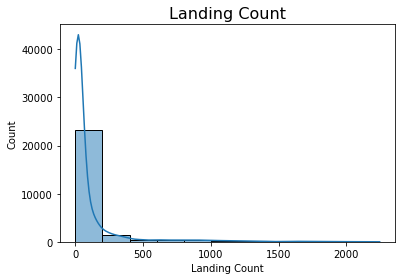

In [123]:
bins = np.arange(1,2300,200)
sb.histplot(x= df['Landing Count'],kde = True, bins = bins);
plt.title('Landing Count', size =16)

In [124]:
df['Landing Count'].mean()

110.23483388139245

The landing count is normal distribution with average of 110.23 

Text(0.5, 1.0, 'Landed Weight Count')

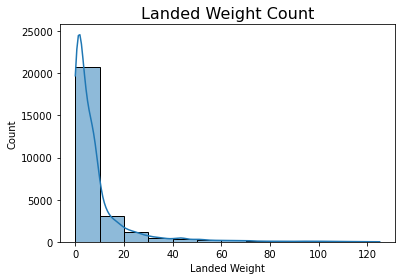

In [125]:
bins = np.arange(0,126,10)
sb.histplot(x= df['Landed Weight'],kde = True, bins = bins);
plt.title('Landed Weight Count', size =16)

In [126]:
df['Landed Weight'].mean()

8.465790461933269

The landed weight is normal distribution with average of 8.46 Million Kilogram

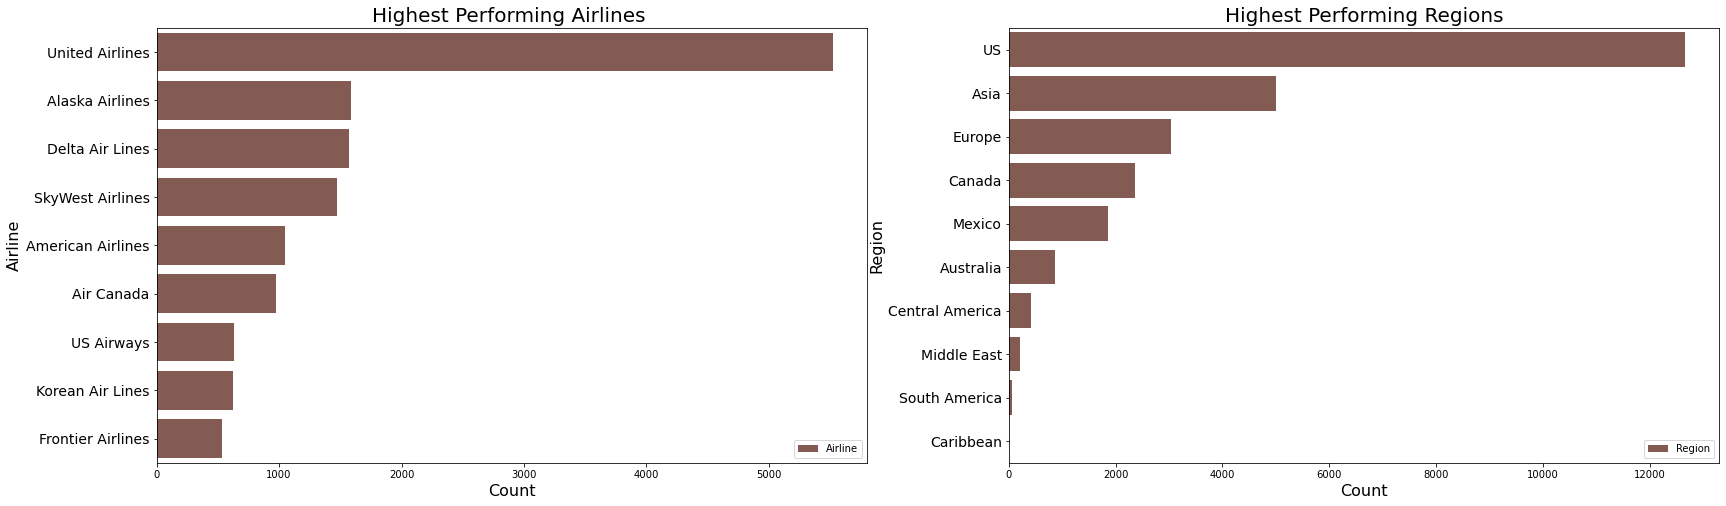

In [127]:
plt.figure(figsize =(28,8))
plt.subplot(1,2,2)
color_base = sb.color_palette()[5]
order = df['Region'].value_counts().index
sb.countplot(data=df, y =df['Region'],order =order, color = color_base)
plt.legend(labels = ['Region'], loc ='lower right')
plt.yticks(size=14);
plt.xlabel('Count', size=16)
plt.ylabel('Region', size=16)
plt.title('Highest Performing Regions', size =20);

plt.subplot(1,2,1)
color_base = sb.color_palette()[5]
order = df['Airline'].value_counts().index[0:9]
sb.countplot(data=df, y =df['Airline'],order =order, color = color_base)
plt.legend(labels = ['Airline'], loc ='lower right')
plt.yticks(size=14);
plt.xlabel('Count', size=16)
plt.ylabel('Airline', size=16)
plt.title('Highest Performing Airlines ', size =20);

#### The highest performing airlines are (United Airlines,Alaska Airlines, and Delta Airlines)
#### The highest performing regions are (United States,Asia, and Europe)

In [128]:
df['Flight Type'].value_counts()

International    13838
Domestic         12619
Name: Flight Type, dtype: int64

In [129]:
df['Aircraft Type'].value_counts()

Passenger    23332
Freighter     2983
Combi          142
Name: Aircraft Type, dtype: int64

In [130]:
df['Aircraft Body Type'].value_counts()

Wide Body       12623
Narrow Body     11231
Regional Jet     2097
Turbo Prop        506
Name: Aircraft Body Type, dtype: int64

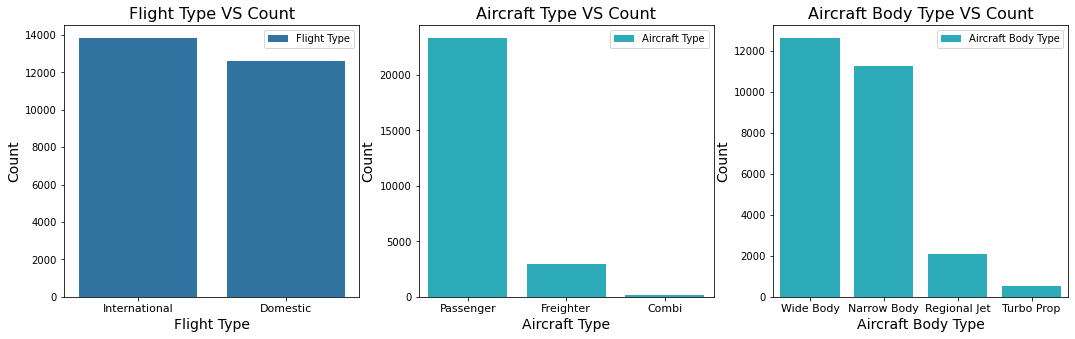

In [131]:
plt.figure(figsize =(18,5))
plt.subplot(1,3,1)
color_base = sb.color_palette()[0]
order = df['Flight Type'].value_counts().index
sb.countplot(data=df, x =df['Flight Type'],order =order, color = color_base)
plt.legend(labels = ['Flight Type'], loc ='upper right')
plt.xticks(size=11);
plt.ylabel('Count', size=14)
plt.xlabel('Flight Type', size=14)
plt.title('Flight Type VS Count', size=16);

plt.subplot(1,3,2)
color_base = sb.color_palette()[9]
order = df['Aircraft Type'].value_counts().index
sb.countplot(data=df, x =df['Aircraft Type'],order =order, color = color_base)
plt.legend(labels = ['Aircraft Type'], loc ='upper right')
plt.xticks(size=11);
plt.ylabel('Count', size=14)
plt.xlabel('Aircraft Type', size=14)
plt.title('Aircraft Type VS Count', size=16);

plt.subplot(1,3,3)
color_base = sb.color_palette()[9]
order = df['Aircraft Body Type'].value_counts().index
sb.countplot(data=df, x =df['Aircraft Body Type'],order =order, color = color_base)
plt.legend(labels = ['Aircraft Body Type'], loc ='upper right')
plt.xticks(size=11);
plt.ylabel('Count', size=14)
plt.xlabel('Aircraft Body Type', size=14)
plt.title('Aircraft Body Type VS Count', size=16);


#### The two flight types (international and domestic) are performing closely with difference of 9.2% higher flights for international flights. 

#### The highest aircraft type operated is pessenger aircrafts with percenatage of 88.2% and 23.3K flights during the period. 

#### The highest two aircraft body types operated are wide and narrow body and are performing with difference of 11.6% higher flights for wide body aircrafts. 

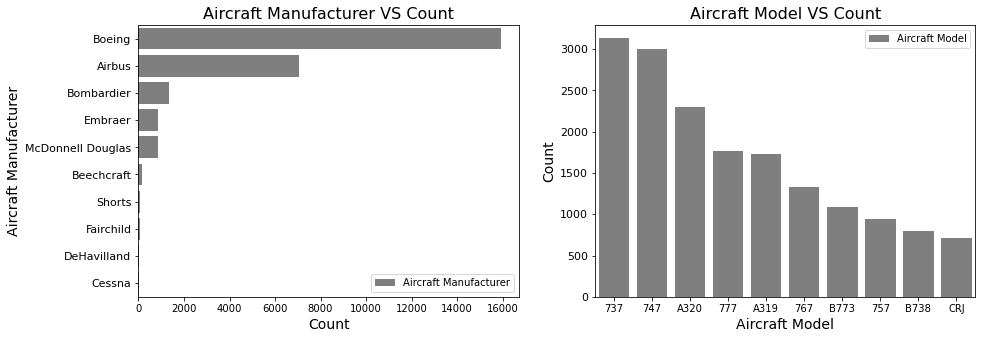

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color_base = sb.color_palette()[7]
order = df['Aircraft Manufacturer'].value_counts().index[0:10]
sb.countplot(data=df, y =df['Aircraft Manufacturer'],order =order, color = color_base)
plt.legend(labels = ['Aircraft Manufacturer'], loc ='lower right')
plt.yticks(size=11);
plt.xlabel('Count', size=14)
plt.ylabel('Aircraft Manufacturer', size=14)
plt.title('Aircraft Manufacturer VS Count',size=16);

plt.subplot(1,2,2)
color_base = sb.color_palette()[7]
order = df['Aircraft Model'].value_counts().index[0:10]
sb.countplot(data=df, x =df['Aircraft Model'],order =order, color = color_base)
plt.legend(labels = ['Aircraft Model'], loc ='upper right')
plt.yticks(size=11);
plt.xlabel('Aircraft Model', size=14)
plt.ylabel('Count', size=14)
plt.title('Aircraft Model VS Count',size=16);

#### The top performing aircraft manufacturers are (Boeing, Airbus, and Bombardier)
#### The top performing aircraft models are (Boeing 737, Boeing 747 , and Airbus A320)

Text(0.5, 1.0, 'Flights Count Per Year')

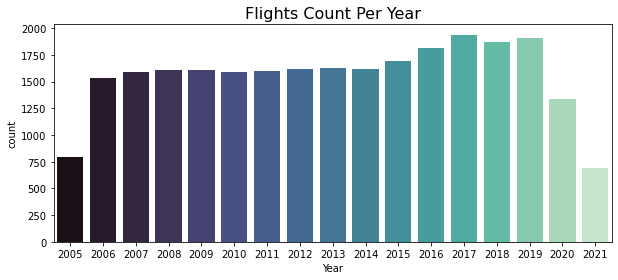

In [133]:
plt.figure(figsize = (10,4))
sb.countplot(data=df, x=df['Year'], palette = 'mako')
plt.title("Flights Count Per Year", size =16)

#### Flights number increased during the period from 2015 till 2019
#### Decline occurred in 2020 probably due to COVID-19 consequences

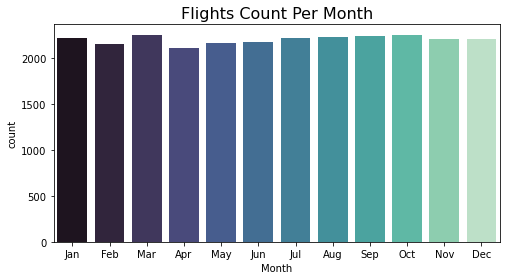

In [134]:
plt.figure(figsize = (8,4))
import calendar
list = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['Month'] = df['Month'].apply(lambda x:list[x])
sb.countplot(data=df, x=df['Month'], palette = 'mako',order= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Flights Count Per Month", size =16);

#### Steady performance for flights count through the year with increase in the first quarter at top in March as holiday high season.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  26457 non-null  object 
 1   Year                   26457 non-null  int64  
 2   Region                 26457 non-null  object 
 3   Airline                26457 non-null  object 
 4   IATA Code              26457 non-null  object 
 5   Flight Type            26457 non-null  object 
 6   Aircraft Type          26457 non-null  object 
 7   Aircraft Body Type     26457 non-null  object 
 8   Aircraft Manufacturer  26457 non-null  object 
 9   Aircraft Model         26457 non-null  object 
 10  Landing Count          26457 non-null  int64  
 11  Landed Weight          26457 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.4+ MB


In [136]:
list = {'Jan':1,'Feb':2, 'Mar':3 , 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8,'Sep':9, 'Oct':10,'Nov':11,'Dec':12}

df['Month'] = df['Month'].apply(lambda x:list[x])
df['Month']=pd.to_datetime(df['Month'])
df['Year']=pd.to_datetime(df['Year'])

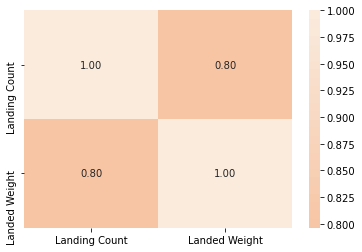

In [137]:
# check the correlation between landing count and weight
sb.heatmap(df.corr(),annot = True, fmt = '.2f', cmap = "rocket", center = 0);

#### The correlation matrix indicates strong correlation between the landing count and landed weight. 

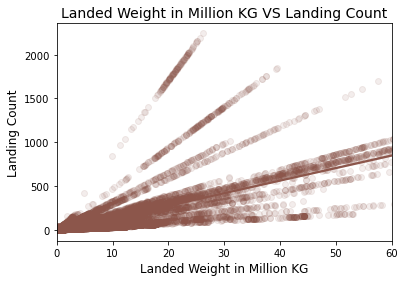

In [138]:
# checking the relationship between Landed Weight in Million KG VS Landing Count
base_color = sb.color_palette()[5]
sb.regplot(data=df, x =df["Landed Weight"], y =df["Landing Count"], color =base_color, x_jitter =0.05, scatter_kws={'alpha':1/10})
plt.xticks(size =10)
plt.yticks(size=10)
plt.xlabel("Landed Weight in Million KG", size=12)
plt.ylabel("Landing Count", size=12)
plt.xlim(0,60)
plt.title('Landed Weight in Million KG VS Landing Count', size =14);

#### The scatter plots indicates the highest data points of landed weight up to 30 Million KG and around 500 landing flightes. 

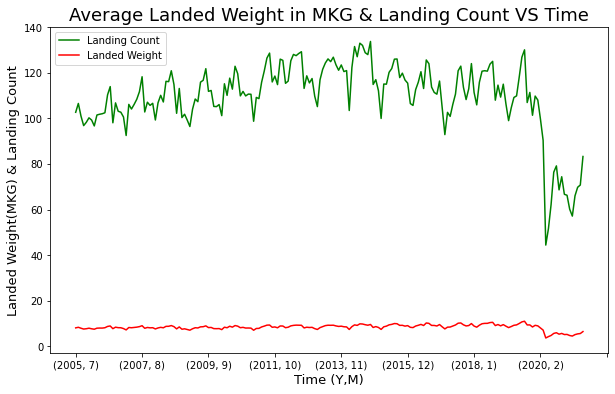

In [139]:
# Time Series to check Landing Count and Landed Weight in Million KG
df['Month']=pd.to_numeric(df['Month'])
df['Year']=pd.to_numeric(df['Year'])
Count_plot = df.groupby([(df.Year),(df.Month)])['Landing Count'].mean()
Count_plot.plot(style='g', figsize=(10,6),label='Landing Count')

Weight_plot = df.groupby([(df.Year),(df.Month)])['Landed Weight'].mean()
Weight_plot.plot(style='r', figsize=(10,6),label='Landed Weight')
plt.title('Average Landed Weight in MKG & Landing Count VS Time', size = 18)
plt.xlabel('Time (Y,M)', size = 13)
plt.ylabel('Landed Weight(MKG) & Landing Count', size = 13)
plt.legend()

#### The Time Series indicates the following:
##### Landing Flights Count Performance:
- A fluctuating performance of landing flights count with an average of 110 flights yearly. 
- Declining drastically in performance of landing flights count, lowest in April, 2020 to 44 flights, due to COVID-19 situation.

##### Landed Weight Performance:
- A steady performance of landed weight in Million of Kilograms of average of 8.4 Million KG yearly. 
- Declining in performance of landed weight during 2020 to 6.13 Million KG, due to COVID-19 situation. 

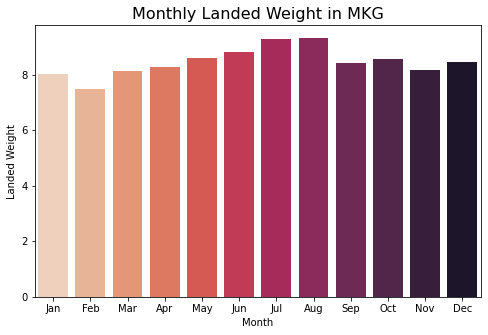

In [140]:
plt.figure(figsize = (8,5))
import calendar
list = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['Month'] = df['Month'].apply(lambda x:list[x])
sb.barplot(data=df, x=df['Month'], y =df['Landed Weight'], palette = 'rocket_r', ci = None, order= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Landed Weight in MKG', size =16);

#### The landed weight monthly analysis showed normal distribution with seasonal performance. The peak is in July and August.

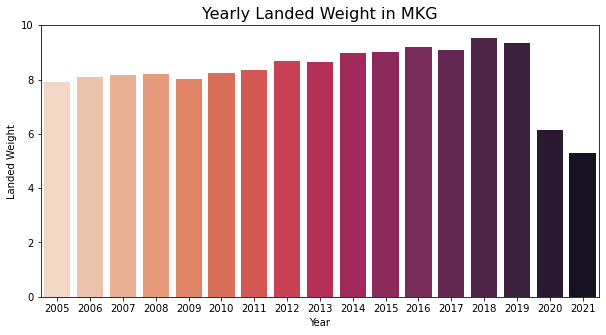

In [141]:
plt.figure(figsize = (10,5))
sb.barplot(data=df, x=df['Year'], y =df['Landed Weight'], palette = 'rocket_r', ci =None)
plt.title('Yearly Landed Weight in MKG', size =16);

#### The landed weight yearly analysis showed positive trend during the period 2005-2019. 
#### Decline occurred in 2020 due to COVID-19 while 2021 is showing positive trend till July, 2021 the end of period investigated. 

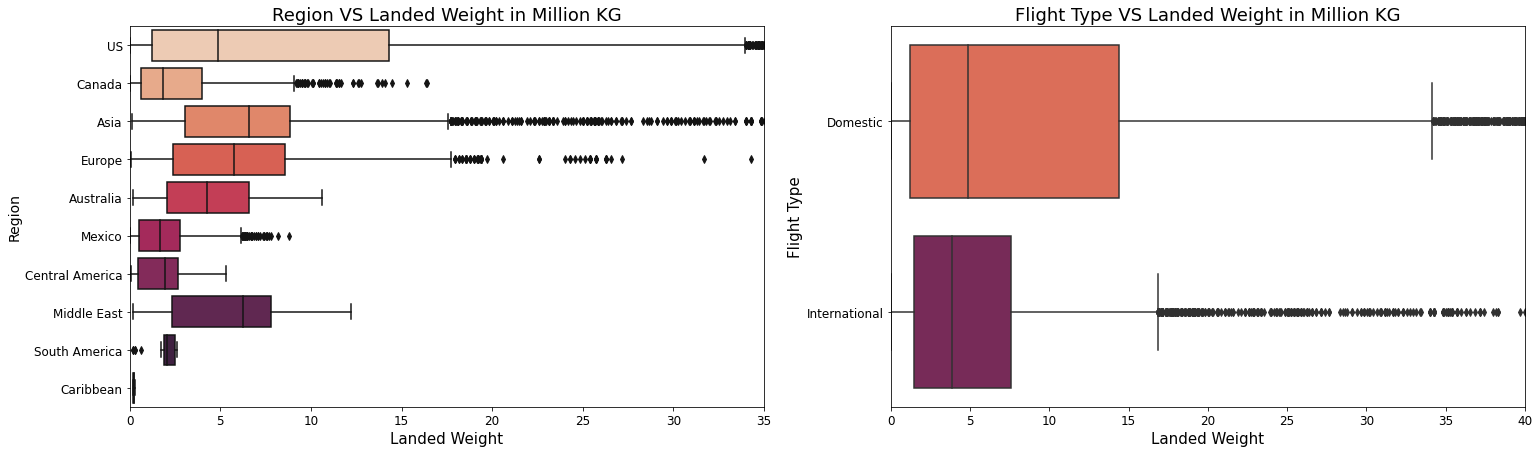

In [142]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sb.boxplot(data=df, x='Landed Weight' ,y= 'Region',palette = "rocket_r")
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel("Landed Weight", size=15)
plt.ylabel("Region", size=14)
plt.xlim((0,35))
plt.title("Region VS Landed Weight in Million KG",size =18)

plt.subplot(1,2,2)
sb.boxplot(data=df, x='Landed Weight' ,y= 'Flight Type',palette = "rocket_r")
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel("Landed Weight", size=15)
plt.ylabel("Flight Type", size=15)
plt.xlim((0,40))
plt.title("Flight Type VS Landed Weight in Million KG", size =18);

The highest landed weight regions are as follows: 
- US is the highest with 0.15 Trillion KG
- Asia is second with 38.99 Billion KG
- Europe is third with 19.15 Billion KG

The highest landed weight vs flight type are as follows: 
- Domestic flights landed 0.15 Trillion KG
- International flights landed 0.073 Trillion KG



Text(0.5, 1.0, 'Aircraft Type VS Landing Count')

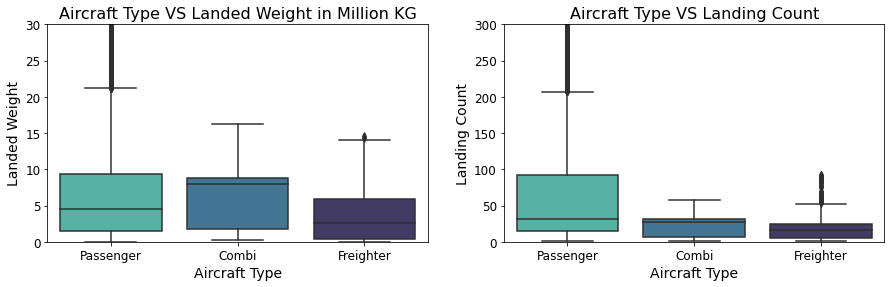

In [143]:
# plot Aircraft Type with landed Weight
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sb.boxplot(data= df, x ='Aircraft Type', y='Landed Weight',order =['Passenger','Combi','Freighter'], palette = "mako_r")
plt.ylim((0,30))
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel('Aircraft Type', size=14)
plt.ylabel('Landed Weight', size=14);
plt.title("Aircraft Type VS Landed Weight in Million KG", size =16)
# plot Aircraft Type with landing Count
plt.subplot(1,2,2)
sb.boxplot(data= df, x ='Aircraft Type', y='Landing Count', order =['Passenger','Combi','Freighter'],palette = "mako_r")
plt.ylim((0,300))
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel('Aircraft Type', size=14)
plt.ylabel('Landing Count', size=14);
plt.title("Aircraft Type VS Landing Count", size =16)

In [144]:
df.groupby(df['Aircraft Type'])['Landed Weight'].mean()

Aircraft Type
Combi        7.299485
Freighter    3.436677
Passenger    9.115862
Name: Landed Weight, dtype: float64

In [145]:
df.groupby(df['Aircraft Type'])['Landing Count'].mean()

Aircraft Type
Combi         25.563380
Freighter     17.301039
Passenger    122.631750
Name: Landing Count, dtype: float64

#### The passenger aircrafts performed highest at landed weight with average of 9.11 Million KG and average landing flights count of 122.6 flights during the period. 

Text(0.5, 1.0, 'Landing Count VS Aircraft Body Type')

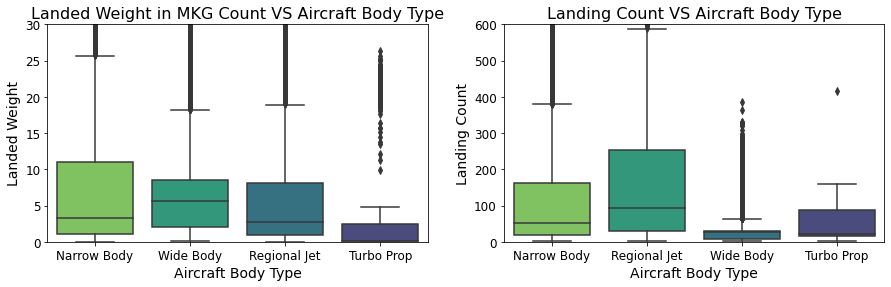

In [146]:
# plot Aircraft Body Type with landed Weight
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sb.boxplot(data= df, x ='Aircraft Body Type', y='Landed Weight', palette = "viridis_r")
plt.ylim((0,30))
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel('Aircraft Body Type', size=14)
plt.ylabel('Landed Weight', size=14);
plt.title('Landed Weight in MKG Count VS Aircraft Body Type', size =16)

# plot Aircraft Body Type with landing Count
plt.subplot(1,2,2)
sb.boxplot(data= df, x ='Aircraft Body Type', y='Landing Count', palette = "viridis_r", order = ['Narrow Body','Regional Jet','Wide Body','Turbo Prop'])
plt.ylim((0,600))
plt.xticks(size =12)
plt.yticks(size=12)
plt.xlabel('Aircraft Body Type', size=14)
plt.ylabel('Landing Count', size=14);
plt.title('Landing Count VS Aircraft Body Type', size=16)

#### Narrow Aircraft Body Type performed higher in both landed weight of (121 Billion KG) and landing flights count (1.77 Million Flights)

In [147]:
x = df.groupby(df['Aircraft Body Type'])['Landed Weight'].sum()
x = x/1000
print('Landed Weight in Billion KG')
print(x)

Landed Weight in Billion KG
Aircraft Body Type
Narrow Body     121.104176
Regional Jet     14.978430
Turbo Prop        2.553399
Wide Body        85.343413
Name: Landed Weight, dtype: float64


In [148]:
y = df.groupby(df['Aircraft Body Type'])['Landing Count'].sum()
y = y/1000000
print(y)

Aircraft Body Type
Narrow Body     1.771789
Regional Jet    0.540180
Turbo Prop      0.215907
Wide Body       0.388607
Name: Landing Count, dtype: float64


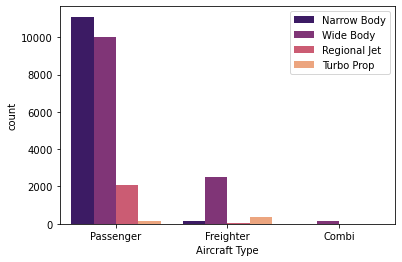

In [149]:
# plot Aircraft Type with Aircraft Body Type
sb.countplot(data=df, x='Aircraft Type', hue='Aircraft Body Type', order = ['Passenger','Freighter', 'Combi'], palette = 'magma')
plt.legend(loc ="upper right")

#### Passenger and Freighter have all aircrafts body types, while Combi operates only wide body type aricraft.

Text(0.5, 1.0, 'Aircraft Body Type by Region')

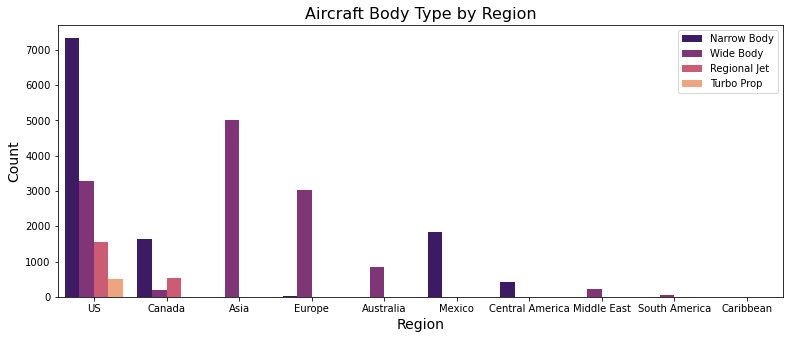

In [151]:
# plot Region with Aircraft Body Type
plt.figure(figsize=(13,5))
sb.countplot(data=df, x ="Region", hue = 'Aircraft Body Type', palette ="magma")
plt.legend( loc ='upper right')
plt.xlabel("Region", size=14)
plt.ylabel("Count", size=14);
plt.title('Aircraft Body Type by Region', size =16)

#### The United States and Canada shows varieties of used aircrafts body types with US has the four types used. 
#### Aircraft with narrow body type is the most common in US while wide body type is the most common used in Asia and Europe. 

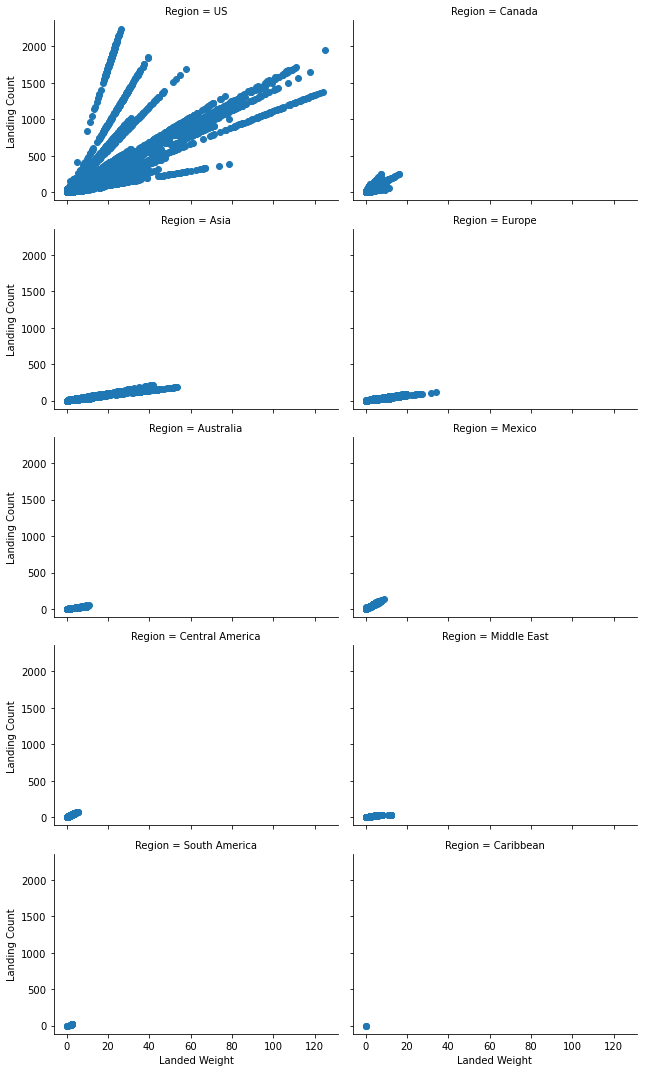

In [152]:
# Landed Weight and Landing Count by Region
g = sb.FacetGrid(data = df, col = 'Region', height=3, aspect=1.5, col_wrap = 2, margin_titles = True)
g.map(plt.scatter,'Landed Weight','Landing Count')
g.add_legend();

#### Checking the two factors Landed Weight and Landing Count by Region, US showed strong correlation followed by Asia and Europe. 

### Conclusion:
- Flights Performance Monthly: Steady performance for flights count through the year with increase in the first quarter at top in March as holiday high season.
- Flights Performance Yearly: Flights number increased during the period from 2015 till 2019 and declined in 2020 probably due to COVID-19 consequences.
- The highest flight count performing airlines and regions: airlines are (United Airlines, Alaska Airlines and Delta Airlines) and  regions are (US, Asia, and Europe).
- Landed weight monthly analysis showed normal distribution with seasonal performance. The peak is in July and August. 
- Landed weight yearly analysis showed positive trend during the period 2005-2019. Decline occurred in 2020 due to COVID-19 while 2021 is showing positive trend till July, 2021 the end of period investigated.
- Landing Flights Count Performance: A fluctuating performance of landing flights count with an average of 110 flights yearly.  Declining drastically in performance of landing flights count, lowest in April, 2020 to 44 flights, due to COVID-19 situation and raising again in 2021. 
- Landed Weight Performance:  A steady performance of landed weight in Million of Kilograms of average of 8.4 Million KG yearly.  Declining in performance of landed weight during 2020 to 6.13 Million KG, due to COVID-19 situation and raising again in 2021. 
- Domestic flights landed 0.15 Trillion KG, while International flights landed only 0.073 Trillion KG
- Surprisingly, Narrow Aircraft Body Type performed higher in both landed weight of (121 Billion KG) and landing flights count (1.77 Million flights)
- The highest aircraft type operated is passenger aircrafts with percentage of 88.2% and 23.3K flights during the period. 

### Suggested improvements based on analysis:
- Expanding and increasing the operations in more regions specially the ones with promising figures as Canada and Mexico.
- Increasing the international flights, operate more freighters aircrafts will also increase the landed weight and profitability. 
- Due to seasonality, flights number increases in the first and last quarter, SFO management needs to implement efficient processes and manpower to provide smooth service to travelers